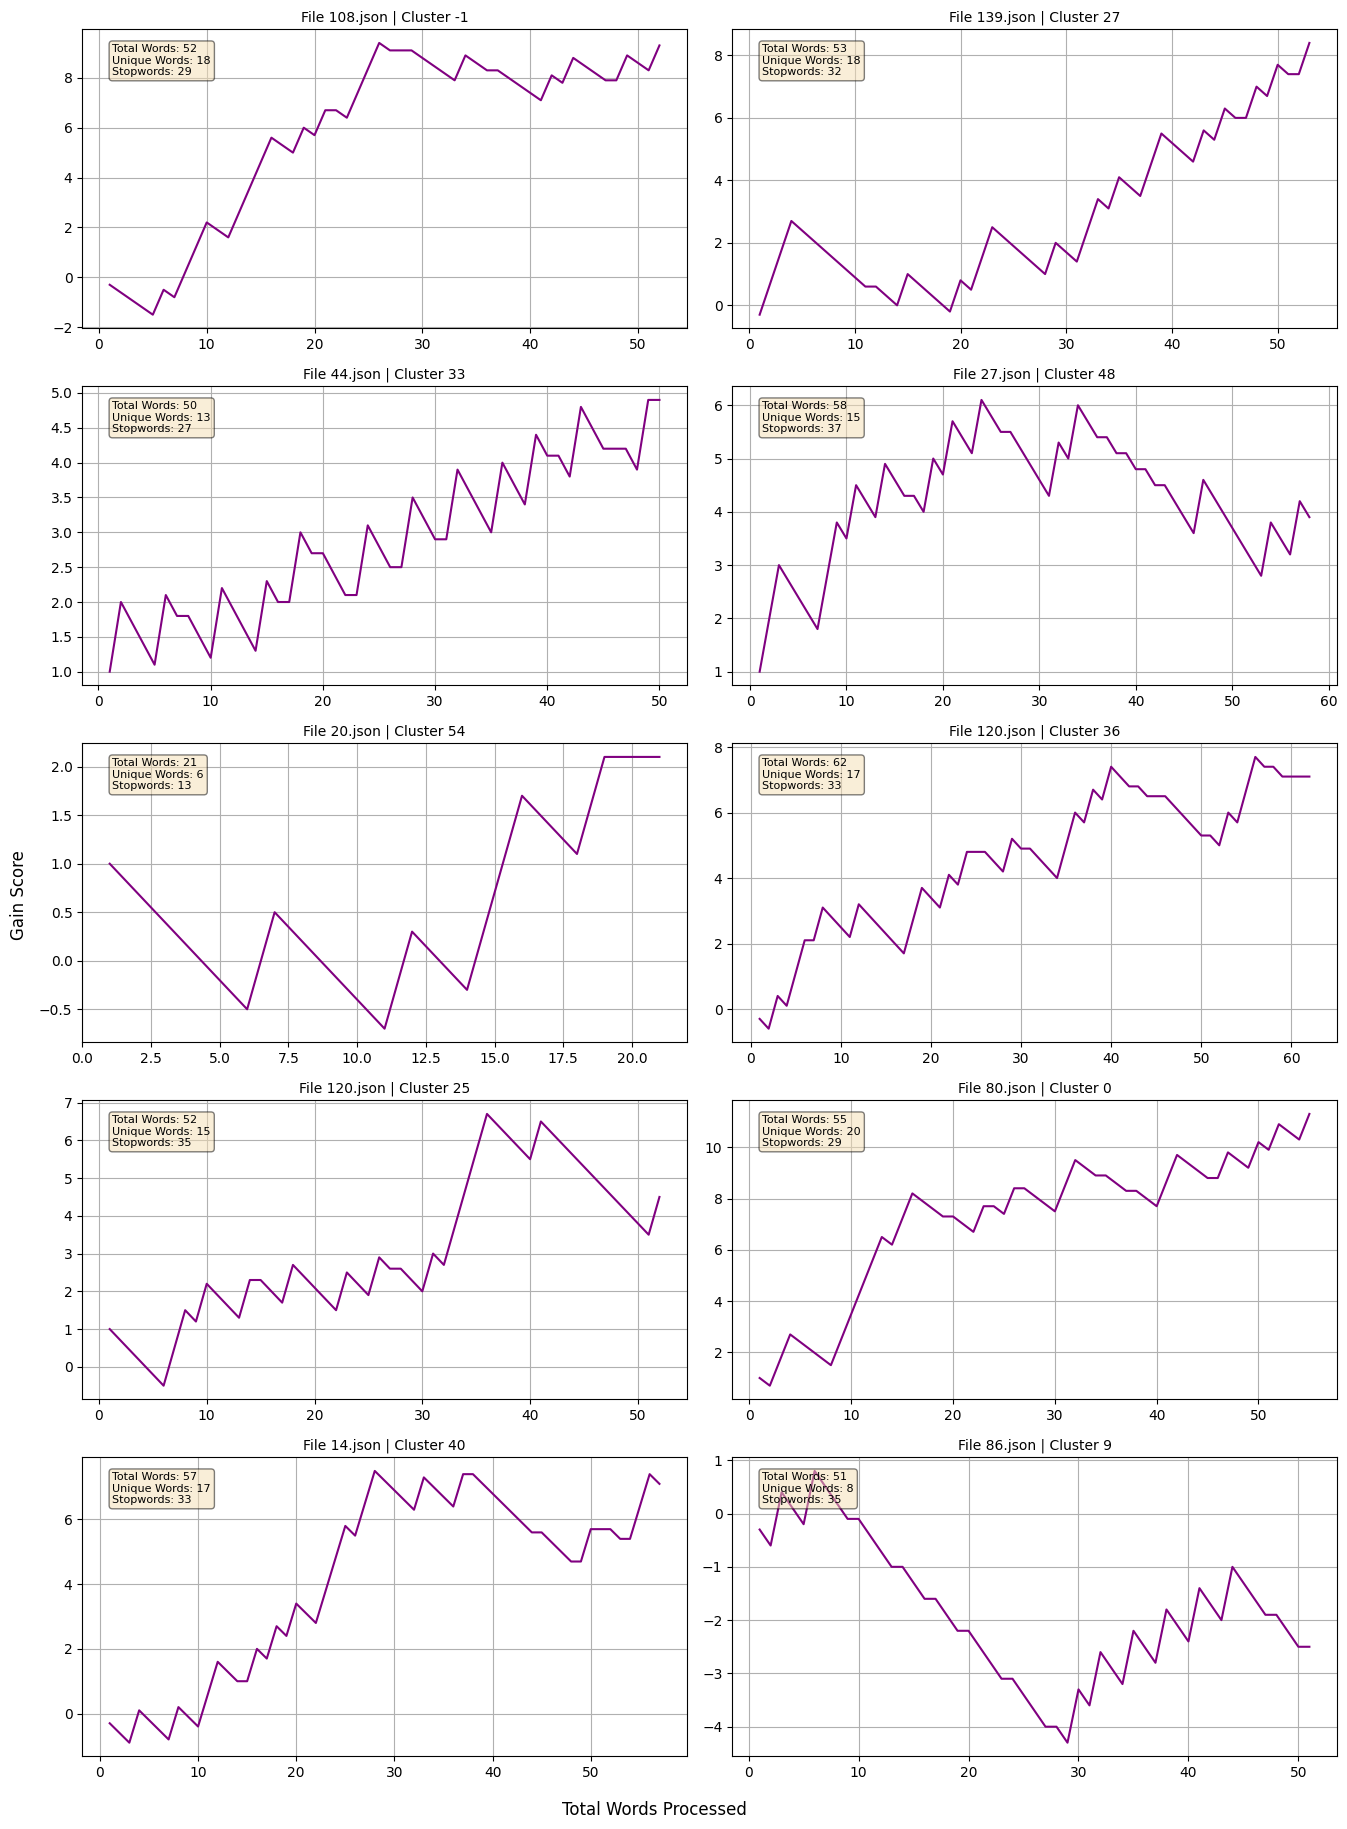

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import random

# !python -m spacy download en_core_web_sm
# Load spaCy English tokenizer and stopword set
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
stopword_weight = 0.3
num_samples = 10

# Load your CSV
df = pd.read_csv("../../clustering/intermediate_data/clustered_embeddings.csv")
df = df[df["text"].notnull() & df["text"].str.strip().astype(bool)]

# Sample 10 random indices
random_indices = random.sample(range(len(df)), num_samples)
fig, axs = plt.subplots(5, 2, figsize=(14, 20))
axs = axs.flatten()

# For each sampled row
for ax, idx in zip(axs, random_indices):
    row = df.iloc[idx]
    text = row["text"]

    doc = nlp(text)
    words_alpha = [token.text.lower() for token in doc if token.is_alpha]

    unique_words = set()
    stopword_count = 0
    total_counts = []
    gain_list = []

    for i, word in enumerate(words_alpha, 1):
        if word in stop_words:
            stopword_count += 1
        else:
            unique_words.add(word)

        gain = len(unique_words) - stopword_weight * stopword_count
        total_counts.append(i)
        gain_list.append(gain)

    ax.plot(total_counts, gain_list, color='purple')
    ax.set_title(f'File {row["file"]} | Cluster {row["cluster"]}', fontsize=10)
    ax.grid(True)
    ax.autoscale()

    textstr = f'Total Words: {len(words_alpha)}\nUnique Words: {len(unique_words)}\nStopwords: {stopword_count}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=8,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

fig.text(0.5, 0.04, 'Total Words Processed', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Gain Score', va='center', rotation='vertical', fontsize=12)
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()